# Predict Regulation Throughput Ratio with CART Decision Trees
## (Lower Frequency Regulation Service)

## 1. Import the necessary modules and libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import pydotplus

# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

## 2. Exploring and Preprocessing the Data

In [2]:
# read data from csv file
df = pd.read_csv("df_lower_alldata.csv").fillna(0)

In [3]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head(5)

,Interval Ending (AEST),BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,...,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Lower Throughput Ratio
0,1/1/18 0:15,14.3,2.44919,13.60,10.63,22.2,15.6,16.6,32.53022,13.22982,...,13.4,7.4,12.43428,13.3,0.0,50.063867,50.070000,2.340012,0.000000,0.020234
1,1/1/18 1:00,9.9,1.51274,8.72,7.63,19.6,17.0,13.1,23.63865,9.43392,...,9.7,1.2,6.01231,8.9,0.0,50.043700,50.040001,1.950005,0.010002,0.126083
2,1/1/18 1:15,11.0,0.79239,9.27,7.26,14.6,16.0,12.0,22.36064,5.13563,...,8.9,2.3,4.41001,4.1,0.0,50.047967,50.040001,2.269928,0.050003,0.090646
3,1/1/18 1:55,4.7,1.65681,6.49,-0.06,10.7,21.9,16.2,26.73126,6.47535,...,11.4,7.3,8.23130,0.2,0.0,50.032533,50.029999,2.140041,0.020000,0.181213
4,1/1/18 2:10,3.7,0.72035,5.34,-0.36,13.0,22.6,22.0,25.91605,7.81508,...,12.3,6.4,6.92434,-0.4,0.0,50.029000,50.029999,2.140018,-0.060001,0.106281


In [4]:
column_names=list(df)
column_names

['Interval Ending (AEST)',
 'BLUFF1',
 'CLEMGPWF',
 'HALLWF1',
 'HALLWF2',
 'HDWF1',
 'HDWF2',
 'HDWF3',
 'LKBONNY2',
 'LKBONNY3',
 'NBHWF1',
 'SNOWNTH1',
 'SNOWSTH1',
 'SNOWTWN1',
 'WATERLWF',
 'Unnamed: 15',
 'Average Frequency (Hz)',
 'Median Frequency (Hz)',
 'Cummulative Frequency (Hz)',
 'Difference Frequency (Hz)',
 'Lower Throughput Ratio']

In [5]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#df_array = scaler.fit_transform(df)
#df = pd.DataFrame(df_array)
#df.columns=column_names
#df.head(5)

In [6]:
df.describe()

,BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,NBHWF1,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Lower Throughput Ratio
count,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000,20778.000000
mean,19.203651,23.186787,40.469118,30.710160,48.014205,44.679442,47.878493,46.441632,11.577460,58.876390,55.925392,54.765276,43.443422,48.632761,0.797251,50.010700,50.009851,2.382877,-0.001477,0.278321
std,17.072084,18.295492,29.090983,22.213073,32.042073,31.893685,33.359502,44.204632,11.066033,41.338364,44.017710,39.212054,32.232361,39.069051,2.959013,0.039128,0.042637,0.231348,0.082418,0.230872
min,-0.200000,-0.648320,-0.840000,-0.600000,-1.100000,-1.200000,-1.100000,-1.433660,-0.336680,-1.200000,0.000000,0.000000,-0.928820,-1.200000,0.000000,49.842233,49.810001,1.559982,-0.290001,0.000001
25%,2.700000,5.258560,13.083750,9.910000,17.312500,14.600000,16.300000,9.652405,2.501000,19.400000,15.100000,17.355000,10.596363,13.201000,0.000000,49.987033,49.990002,2.229970,-0.059998,0.089060
50%,14.690500,21.290000,39.225000,29.658000,48.700000,42.200000,46.559500,31.355795,7.759260,59.798500,47.800000,51.800000,44.138420,39.300000,0.000000,50.011800,50.009998,2.370018,0.000000,0.223874
75%,36.275108,40.483680,68.280000,51.390000,76.400000,73.374890,77.734265,77.186723,19.035310,96.881890,98.800000,90.354345,73.134880,86.000000,0.000000,50.035533,50.040001,2.520039,0.049999,0.414948
max,52.962000,56.415000,90.670000,70.360000,100.800000,102.300000,109.900000,157.745000,38.684660,131.059000,143.300000,125.017000,96.670120,129.706000,17.900000,50.167866,50.169998,4.440033,0.340000,1.000000


##  3. Split `df` into `df_train`, `df_test` with 30% as test

In [7]:
# If split randomly:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 50)
# If split according to the datetime sequence:
#cut_point = round(len(df)*0.7)
#df_train = df[:cut_point]
#time_train = time[:cut_point]
#df_test = df[cut_point:]
#time_test = time[cut_point:]

display(df_train.head())
display(df_test.head())

,Interval Ending (AEST),BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,...,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Lower Throughput Ratio
20283,10/12/18 9:10,7.8,30.97506,26.79,21.63,32.3,39.5,42.4,1.72464,2.23288,...,44.1,50.5,49.29219,37.3,5.5,50.056900,50.060001,2.450031,0.090000,0.239116
3840,2/7/18 6:25,4.1,15.41549,28.41,14.20,65.6,71.3,59.4,-1.16015,-0.22503,...,25.1,55.9,18.78849,20.9,0.0,50.077467,50.080002,2.500046,0.000000,0.328130
398,1/3/18 5:30,9.6,10.37304,33.76,15.17,46.4,26.9,36.6,21.45103,3.23768,...,49.3,14.8,29.44857,12.4,0.0,50.085667,50.090000,2.419987,0.020000,0.851117
19054,9/29/18 12:50,0.2,-0.36018,-0.49,0.31,2.5,1.3,2.4,9.91876,3.29350,...,5.7,7.2,-0.18310,-0.2,0.0,50.033467,50.020000,2.419987,0.020000,0.226209
4958,2/19/18 14:20,22.6,15.70363,35.83,40.15,18.2,19.4,20.8,147.67801,35.16787,...,76.8,90.5,69.41961,74.7,0.0,50.012967,50.000000,2.129974,0.029999,0.003490


,Interval Ending (AEST),BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,...,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Lower Throughput Ratio
2859,1/24/18 12:35,4.40000,6.98740,3.14000,16.15000,0.60000,4.90000,2.1000,29.82918,6.36371,...,69.600,28.70000,35.78399,10.10000,0.0,50.077233,50.080002,2.440018,-0.080002,0.608133
15922,8/1/18 23:25,48.68200,36.33700,88.40700,63.75600,100.00000,100.00000,109.0000,56.02400,15.30800,...,132.934,105.70400,94.26500,98.47200,0.0,50.067700,50.094999,2.620014,0.200001,0.020814
13694,6/16/18 2:00,44.06906,47.39503,78.99172,59.03591,84.81216,84.81216,90.6326,83.33200,11.41500,...,104.566,104.76796,76.98700,108.09393,0.0,50.018700,50.009998,2.349979,-0.009998,0.038165
11438,5/14/18 5:25,0.09600,7.25500,0.80900,2.89600,16.95700,14.73900,22.5390,0.00000,0.00000,...,17.544,6.84000,12.73600,14.40700,0.0,50.020766,50.020000,2.850010,-0.009998,0.199270
3505,2/2/18 23:10,49.32800,53.72000,56.33800,40.87800,19.97900,33.50800,36.7750,99.55200,20.67700,...,130.224,109.83500,85.87800,83.96200,0.0,50.041600,50.049999,2.119995,0.040001,0.150120


In [8]:
time_train = df_train['Interval Ending (AEST)']
time_test = df_test['Interval Ending (AEST)']
df_train = df_train.drop(['Interval Ending (AEST)'],axis=1)
df_test = df_test.drop(['Interval Ending (AEST)'],axis=1)

In [9]:
# Split df_train
X_train = df_train.drop('Lower Throughput Ratio',axis=1) # Features
Y_train = df_train['Lower Throughput Ratio']

# Split df_train
X_test = df_test.drop('Lower Throughput Ratio',axis=1) # Features
Y_test = df_test['Lower Throughput Ratio']

In [10]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(14544, 19) (14544,)
(6234, 19) (6234,)


## 4. Fit Regression Model

In [11]:
param_grid = {'max_depth':np.arange(1,8),
             'min_samples_leaf':np.arange(1,3),
             'min_samples_split':np.arange(2,4)            
             }

clf = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
clf.fit(X_train,Y_train)

print("best_parms:{0}\nbest_score:{1}".format(clf.best_params_, clf.best_score_))

best_parms:{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}
best_score:0.04394203745566193


In [12]:
max_d = clf.best_params_['max_depth']
min_sl = clf.best_params_['min_samples_leaf']
min_ss = clf.best_params_['min_samples_split']
max_d,min_sl,min_ss

(5, 2, 3)

Text(0, 0.5, 'MSE')

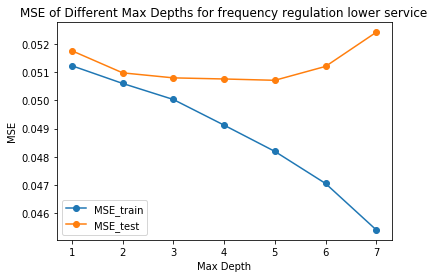

In [13]:
# Find the optimal max_depth
mse_train,mse_test = [],[]
m_d = range(1,8)
for md in m_d:
    DTR = DecisionTreeRegressor(max_depth=md,min_samples_leaf=min_sl,
                           min_samples_split=min_ss)
    DTR.fit(X_train,Y_train)
    Y_train_pred = DTR.predict(X_train)
    mse_train.append(mean_squared_error(Y_train, Y_train_pred))
    Y_test_pred = DTR.predict(X_test)
    mse_test.append(mean_squared_error(Y_test, Y_test_pred))
plt.plot(m_d,mse_train,'o-',label='MSE_train')
plt.plot(m_d,mse_test,'o-',label='MSE_test')
plt.legend()
plt.title('MSE of Different Max Depths for frequency regulation lower service')
plt.xlabel('Max Depth')
plt.ylabel('MSE')

In [14]:
# Choose the max_depth of min mse_test as the optimal max_depth
md_chosen = m_d[mse_test.index(min(mse_test))]
print('optimal max_depth =',md_chosen)

optimal max_depth = 5


In [15]:
DTR = DecisionTreeRegressor(max_depth=md_chosen,min_samples_leaf=min_sl,
                           min_samples_split=min_ss)
DTR.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 5. Predict

In [16]:
Y_train_pred = DTR.predict(X_train)
print('MSE_train =',mean_squared_error(Y_train, Y_train_pred))

MSE_train = 0.04818928778158586


In [17]:
Y_test_pred = DTR.predict(X_test)
print('MSE_test =',mean_squared_error(Y_test, Y_test_pred))

MSE_test = 0.050708768534893436


([], <a list of 0 Text xticklabel objects>)

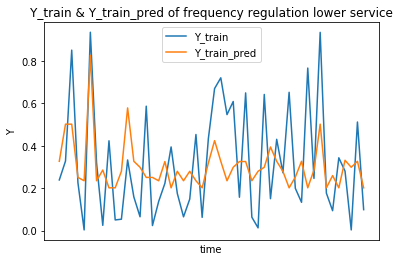

In [21]:
plt.plot(time_train[:50],Y_train[:50],label='Y_train')
plt.plot(time_train[:50],Y_train_pred[:50],label='Y_train_pred')
plt.legend()
plt.title('Y_train & Y_train_pred of frequency regulation lower service')
plt.xlabel('time')
plt.ylabel('Y')
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

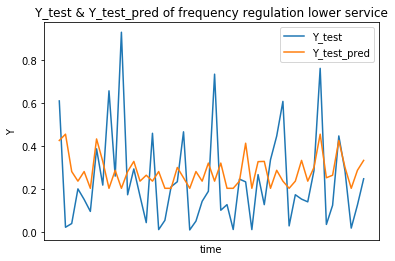

In [19]:
plt.plot(time_test[:50],Y_test[:50],label='Y_test')
plt.plot(time_test[:50],Y_test_pred[:50],label='Y_test_pred')
plt.legend()
plt.title('Y_test & Y_test_pred of frequency regulation lower service')
plt.xlabel('time')
plt.ylabel('Y')
plt.xticks([])

In [20]:
dot_data = tree.export_graphviz(DTR,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_jpg("DecisionTree_lower.jpg")

True